In [1]:
!pip install trustpilot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from trustpilot import client
import pandas as pd
from pandas import json_normalize
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
import re
from datetime import datetime

# pd.set_option('display.max_colwidth', None)
#   

In [4]:
client.default_session.setup(
    api_host="https://api.trustpilot.com",
    api_key='VD4VHCNaU9y11dIYSx0tyaicAZFrJ56r',
    api_version='v1'
)



In [5]:
#611

In [6]:
# flag= False
# page=1
# while page< 5:
  
#   response=client.get(f'https://api.trustpilot.com/v1/business-units/4beee7db00006400050be98b/reviews?page={page}')
#   status_code= response.status_code

#   data=response.json()
#   reviews=data['reviews']
#   df=pd.json_normalize(reviews)
#   flag=df.empty
#   print(page)
#   page=+1

In [7]:
# flag= False
page=1
response=client.get(f'https://api.trustpilot.com/v1/business-units/4beee7db00006400050be98b/reviews?page=1')
status_code= response.status_code

data=response.json()
reviews=data['reviews']
df=pd.json_normalize(reviews)

for p in range(2,1000):
  response=client.get(f'https://api.trustpilot.com/v1/business-units/4beee7db00006400050be98b/reviews?page={p}')
  status_code= response.status_code

  data=response.json()
  reviews=data['reviews']
  df_new=pd.json_normalize(reviews)
  # flag=df.empty
  # print(p)
  # print(flag)
  if df_new.empty:
    break
  df=df.append(df_new, ignore_index=True)
  


In [8]:
df

,links,id,location,stars,title,text,language,createdAt,experiencedAt,updatedAt,...,consumer.id,consumer.displayName,consumer.displayLocation,consumer.numberOfReviews,businessUnit.links,businessUnit.id,businessUnit.identifyingName,businessUnit.displayName,invitation.businessUnitId,invitation
0,[{'href': 'https://api.trustpilot.com/v1/revie...,62eeb4448000af4a8856c109,None,5,Very easy and quick to change my policy…,Very easy and quick to change my policy when I...,en,2022-08-06T20:34:44Z,None,None,...,5558f4310000ff0001bfa01b,Nic,None,34,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,4beee7db00006400050be98b,NaN
1,[{'href': 'https://api.trustpilot.com/v1/revie...,62eea9e84c35e69ec525811a,None,5,Daisy Insured,Easy to complete with no fuss and a great price,en,2022-08-06T19:50:32Z,None,None,...,571e55ff0000ff000a1a8328,Paul,None,7,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,4beee7db00006400050be98b,NaN
2,[{'href': 'https://api.trustpilot.com/v1/revie...,62ee97154c35e69ec525719c,None,5,Straight forward easy to use,Straight forward easy to use,en,2022-08-06T18:30:13Z,None,None,...,56c61c830000ff000a07710a,paul,None,5,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,4beee7db00006400050be98b,NaN
3,[{'href': 'https://api.trustpilot.com/v1/revie...,62ee901a8000af4a8856a3eb,None,3,Good cover at competetive costs,Obtained Home Insurance online after using Com...,en,2022-08-06T18:00:26Z,None,None,...,606493de26ed8a0019e6c48c,Mr Christopher Mcintosh,None,7,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,4beee7db00006400050be98b,NaN
4,[{'href': 'https://api.trustpilot.com/v1/revie...,62ee8d7c4c35e69ec52569d0,None,5,Insurance,"Pleasant experience, done with ease.",en,2022-08-06T17:49:16Z,None,None,...,5d0dbebea9c21edff471b145,Beryl Robinson,None,8,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,4beee7db00006400050be98b,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12316,[{'href': 'https://api.trustpilot.com/v1/revie...,525f916b00006400025f885d,None,4,very good!,very good insurance company !,en,2013-10-17T07:27:39Z,None,None,...,525fad27000064000150ca26,daniel Zimmerman,None,4,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,NaN,NaN
12317,[{'href': 'https://api.trustpilot.com/v1/revie...,50f05f68000064000234f17f,None,5,Did exactly as promised...brilliant insurance,After a burst pipe damaged our home in Novembe...,en,2013-01-11T18:52:24Z,None,None,...,50f05f6500006400012d16de,Barbara Jackson,None,11,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,NaN,NaN
12318,[{'href': 'https://api.trustpilot.com/v1/revie...,5033f9970000640002259133,None,3,good service but poor quote,had two years home insurance with AXA - had g...,en,2012-08-21T21:11:51Z,None,None,...,4f7b44fe0000640001170591,ewan davidson,None,7,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,NaN,NaN
12319,[{'href': 'https://api.trustpilot.com/v1/revie...,4fe1fec5000064000220921d,None,5,"Went there for a cheap premium, will stay foll...",I went to AXA last year for buildings and cont...,en,2012-06-20T16:48:05Z,None,None,...,4fd7298d00006400011b09d9,Michael Hughes,None,18,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,NaN,NaN


In [9]:
df.columns

Index(['links', 'id', 'location', 'stars', 'title', 'text', 'language',
       'createdAt', 'experiencedAt', 'updatedAt', 'companyReply', 'isVerified',
       'source', 'numberOfLikes', 'status', 'reportData', 'complianceLabels',
       'countsTowardsTrustScore', 'countsTowardsLocationTrustScore',
       'businessUnitHistory', 'reviewVerificationLevel', 'consumer.links',
       'consumer.id', 'consumer.displayName', 'consumer.displayLocation',
       'consumer.numberOfReviews', 'businessUnit.links', 'businessUnit.id',
       'businessUnit.identifyingName', 'businessUnit.displayName',
       'invitation.businessUnitId', 'invitation'],
      dtype='object')

### Cleaning the df a little

In [10]:
### 'complianceLabels', 'businessUnitHistory' can contain empty lists and cause errors with unique()



In [11]:
df.drop(['complianceLabels', 'businessUnitHistory'], axis=1,inplace=True)

In [12]:
df.columns

Index(['links', 'id', 'location', 'stars', 'title', 'text', 'language',
       'createdAt', 'experiencedAt', 'updatedAt', 'companyReply', 'isVerified',
       'source', 'numberOfLikes', 'status', 'reportData',
       'countsTowardsTrustScore', 'countsTowardsLocationTrustScore',
       'reviewVerificationLevel', 'consumer.links', 'consumer.id',
       'consumer.displayName', 'consumer.displayLocation',
       'consumer.numberOfReviews', 'businessUnit.links', 'businessUnit.id',
       'businessUnit.identifyingName', 'businessUnit.displayName',
       'invitation.businessUnitId', 'invitation'],
      dtype='object')

In [13]:
#useless columns location, companyReply, reportData, countsTowardsLocationTrustScore, invitation
#Check useful columns on by one
df['invitation'].unique()

array([nan, None], dtype=object)

In [14]:
df.drop(['location', 'companyReply', 'reportData', 'countsTowardsLocationTrustScore', 'invitation'], axis=1,inplace=True)

In [15]:
df.columns

Index(['links', 'id', 'stars', 'title', 'text', 'language', 'createdAt',
       'experiencedAt', 'updatedAt', 'isVerified', 'source', 'numberOfLikes',
       'status', 'countsTowardsTrustScore', 'reviewVerificationLevel',
       'consumer.links', 'consumer.id', 'consumer.displayName',
       'consumer.displayLocation', 'consumer.numberOfReviews',
       'businessUnit.links', 'businessUnit.id', 'businessUnit.identifyingName',
       'businessUnit.displayName', 'invitation.businessUnitId'],
      dtype='object')

### Cleaning the dates

In [16]:
# time_string=df['createdAt'][0]

In [17]:

# df['time_string_regex']=re.search("([0-9]{4}\-[0-9]{2}\-[0-9]{2})", df['createdAt'])
df['time_string_regex']=  df['createdAt'].apply(lambda x:  re.search("([0-9]{4}\-[0-9]{2}\-[0-9]{2})", x))
df['date']=df['time_string_regex'].apply(lambda x:  datetime.fromisoformat(x[0]))    

In [18]:
df.head()

,links,id,stars,title,text,language,createdAt,experiencedAt,updatedAt,isVerified,...,consumer.displayName,consumer.displayLocation,consumer.numberOfReviews,businessUnit.links,businessUnit.id,businessUnit.identifyingName,businessUnit.displayName,invitation.businessUnitId,time_string_regex,date
0,[{'href': 'https://api.trustpilot.com/v1/revie...,62eeb4448000af4a8856c109,5,Very easy and quick to change my policy…,Very easy and quick to change my policy when I...,en,2022-08-06T20:34:44Z,None,None,True,...,Nic,None,34,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,4beee7db00006400050be98b,"<re.Match object; span=(0, 10), match='2022-08...",2022-08-06
1,[{'href': 'https://api.trustpilot.com/v1/revie...,62eea9e84c35e69ec525811a,5,Daisy Insured,Easy to complete with no fuss and a great price,en,2022-08-06T19:50:32Z,None,None,True,...,Paul,None,7,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,4beee7db00006400050be98b,"<re.Match object; span=(0, 10), match='2022-08...",2022-08-06
2,[{'href': 'https://api.trustpilot.com/v1/revie...,62ee97154c35e69ec525719c,5,Straight forward easy to use,Straight forward easy to use,en,2022-08-06T18:30:13Z,None,None,True,...,paul,None,5,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,4beee7db00006400050be98b,"<re.Match object; span=(0, 10), match='2022-08...",2022-08-06
3,[{'href': 'https://api.trustpilot.com/v1/revie...,62ee901a8000af4a8856a3eb,3,Good cover at competetive costs,Obtained Home Insurance online after using Com...,en,2022-08-06T18:00:26Z,None,None,True,...,Mr Christopher Mcintosh,None,7,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,4beee7db00006400050be98b,"<re.Match object; span=(0, 10), match='2022-08...",2022-08-06
4,[{'href': 'https://api.trustpilot.com/v1/revie...,62ee8d7c4c35e69ec52569d0,5,Insurance,"Pleasant experience, done with ease.",en,2022-08-06T17:49:16Z,None,None,True,...,Beryl Robinson,None,8,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,4beee7db00006400050be98b,"<re.Match object; span=(0, 10), match='2022-08...",2022-08-06


In [30]:
df_by_day=df.groupby('date').count()[['id', 'links']]
df_by_day['date']=df_by_day.index
df_by_day['ranking']=df.groupby('date').mean()['stars']
df_by_day

,id,links,date,ranking
date,,,,
2011-07-19,1,1,2011-07-19,5.000000
2012-06-20,1,1,2012-06-20,5.000000
2012-08-21,1,1,2012-08-21,3.000000
2013-01-11,1,1,2013-01-11,5.000000
2013-10-17,1,1,2013-10-17,4.000000
...,...,...,...,...
2022-08-02,8,8,2022-08-02,3.750000
2022-08-03,6,6,2022-08-03,5.000000
2022-08-04,3,3,2022-08-04,2.333333


In [33]:
df_by_day.tail(16)

,id,links,date,ranking
date,,,,
2022-07-22,29,29,2022-07-22,4.551724
2022-07-23,5,5,2022-07-23,4.800000
2022-07-24,3,3,2022-07-24,5.000000
2022-07-25,6,6,2022-07-25,3.666667
2022-07-26,3,3,2022-07-26,3.666667
2022-07-27,6,6,2022-07-27,3.000000
2022-07-28,2,2,2022-07-28,1.000000
2022-07-29,93,93,2022-07-29,4.537634
2022-07-30,16,16,2022-07-30,4.375000


In [32]:
df_by_week=df_by_day.groupby([pd.Grouper(key='date', freq='w')]).sum()
df_by_week['ranking/7']=df_by_week['ranking']/7
df_by_week

,id,links,ranking,ranking/7
date,,,,
2011-07-24,1,1,5.000000,0.714286
2011-07-31,0,0,0.000000,0.000000
2011-08-07,0,0,0.000000,0.000000
2011-08-14,0,0,0.000000,0.000000
2011-08-21,0,0,0.000000,0.000000
...,...,...,...,...
2022-07-10,187,187,30.807104,4.401015
2022-07-17,165,165,26.306838,3.758120
2022-07-24,163,163,30.924475,4.417782


In [37]:
df_by_month=df_by_day.groupby([pd.Grouper(key='date', freq='M')]).sum()
df_by_month['ranking/30']=df_by_month['ranking']/30
df_by_month

,id,links,ranking,ranking/30
date,,,,
2011-07-31,1,1,5.000000,0.166667
2011-08-31,0,0,0.000000,0.000000
2011-09-30,0,0,0.000000,0.000000
2011-10-31,0,0,0.000000,0.000000
2011-11-30,0,0,0.000000,0.000000
...,...,...,...,...
2022-04-30,411,411,111.093465,3.703116
2022-05-31,464,464,117.223496,3.907450
2022-06-30,434,434,114.142566,3.804752


In [22]:
df_by_week[df_by_week['id']==1].shape

(55, 2)

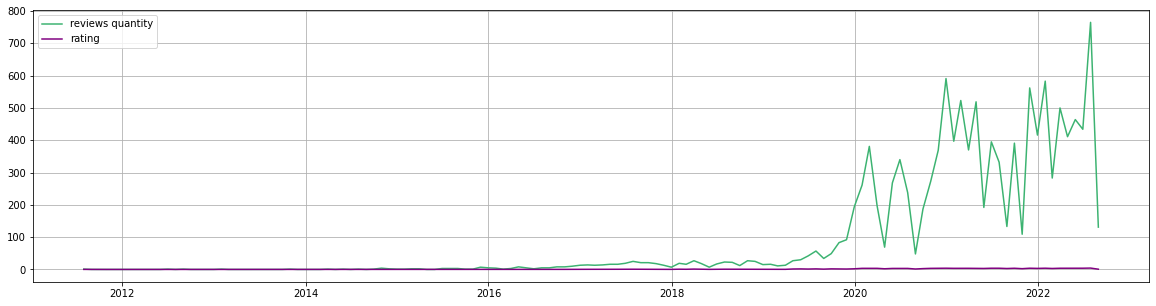

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.plot(df_by_month['id'], label='reviews quantity', color='mediumseagreen')
plt.plot(df_by_month['ranking/30'], label='rating', color='purple')
plt.legend()

plt.grid()
plt.show()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


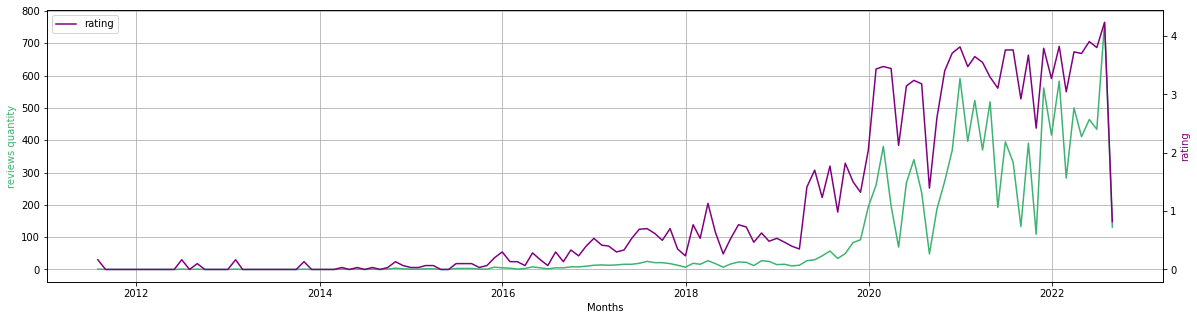

In [54]:
plt.figure(figsize=(20, 5))
plt.grid()
ax1 = plt.subplot()
l1 = ax1.plot(df_by_month['id'], label='reviews quantity', color='mediumseagreen')
ax2 = ax1.twinx()
l2 = ax2.plot(df_by_month['ranking/30'], label='rating', color='purple')
ax1.set_xlabel('Months')
ax1.set_ylabel('reviews quantity', color='mediumseagreen')
ax2.set_ylabel('rating', color='purple')

plt.legend()


plt.show()

In [24]:

df['date'][0]

Timestamp('2022-08-06 00:00:00')

###check consumers
df['consumer.links'][3]

it can contain interesting information. Links include images

In [25]:
df[df['source']=='Organic'][['source', 'consumer.links', 'consumer.id']]

,source,consumer.links,consumer.id
42,Organic,[{'href': 'https://api.trustpilot.com/v1/consu...,5313b844000064000166c410
65,Organic,[{'href': 'https://api.trustpilot.com/v1/consu...,62ed10590f3d3300128112ef
107,Organic,[{'href': 'https://api.trustpilot.com/v1/consu...,5db3804bec39895a42155504
108,Organic,[{'href': 'https://api.trustpilot.com/v1/consu...,585157d00000ff000a61a675
109,Organic,[{'href': 'https://api.trustpilot.com/v1/consu...,60e9f49b075f00001151839a
...,...,...,...
12139,Organic,[{'href': 'https://api.trustpilot.com/v1/consu...,5923576d0000ff000a9b4204
12140,Organic,[{'href': 'https://api.trustpilot.com/v1/consu...,55b7e1ed0000ff0001cffbf8
12141,Organic,[{'href': 'https://api.trustpilot.com/v1/consu...,591ca6330000ff000a997887
12142,Organic,[{'href': 'https://api.trustpilot.com/v1/consu...,536d025a0000640001729e85


In [26]:
df[df['source']!='Organic'].iloc[0]

links                           [{'href': 'https://api.trustpilot.com/v1/revie...
id                                                       62eeb4448000af4a8856c109
stars                                                                           5
title                                    Very easy and quick to change my policy…
text                            Very easy and quick to change my policy when I...
language                                                                       en
createdAt                                                    2022-08-06T20:34:44Z
experiencedAt                                                                None
updatedAt                                                                    None
isVerified                                                                   True
source                                                       FileUploadInvitation
numberOfLikes                                                                   0
status          